## 퀴즈

```
1. 2000년도 이후 데이터를 구하시요
2. 1995~2000 년도 데이터를 구하시요
3. 남아출생이 가장많은 top5를 구하시요(년도,남아수 출력)
4. 남아율(%)컬럼을 추가하고 각년도 별 남아수가 차지하는 비율을 보여주시요
5. 2000년도 이후 데이터를 바차트로 보여주시요
```

In [ ]:
from pyspark import SparkContext
from pyspark.sql import SQLContext, Row
import pandas as pd

from pyspark.sql.functions import when, udf, col, regexp_replace
from pyspark.sql.types import DoubleType,IntegerType, StringType

In [ ]:
sc= SparkContext('local')
sqlCtx= SQLContext(sc)

In [ ]:
df= sqlCtx.read.csv('data/births.txt', inferSchema=True)
df

DataFrame[_c0: int, _c1: double, _c2: double]

In [ ]:
df.show()

+----+--------+--------+
| _c0|     _c1|     _c2|
+----+--------+--------+
|1880| 90993.0|110491.0|
|1881| 91954.0|100745.0|
|1882|107850.0|113688.0|
|1883|112321.0|104629.0|
|1884|129022.0|114445.0|
|1885|133055.0|107800.0|
|1886|144535.0|110784.0|
|1887|145982.0|101414.0|
|1888|178627.0|120853.0|
|1889|178366.0|110584.0|
|1890|190377.0|111025.0|
|1891|185482.0|101196.0|
|1892|212346.0|122037.0|
|1893|212906.0|112317.0|
|1894|222922.0|115772.0|
|1895|233630.0|117398.0|
|1896|237920.0|119570.0|
|1897|234202.0|112758.0|
|1898|258770.0|122693.0|
|1899|233023.0|106212.0|
+----+--------+--------+
only showing top 20 rows



In [ ]:
df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- _c1: double (nullable = true)
 |-- _c2: double (nullable = true)



#### .withColumnRenamed('변환 전', '변환 후')
- 컬럼 명 변경

In [ ]:
df= df.withColumnRenamed('_c0', 'year')\
.withColumnRenamed('_c1', 'boys')\
.withColumnRenamed('_c2', 'girls')

In [ ]:
df.show()

+----+--------+--------+
|year|    boys|   girls|
+----+--------+--------+
|1880| 90993.0|110491.0|
|1881| 91954.0|100745.0|
|1882|107850.0|113688.0|
|1883|112321.0|104629.0|
|1884|129022.0|114445.0|
|1885|133055.0|107800.0|
|1886|144535.0|110784.0|
|1887|145982.0|101414.0|
|1888|178627.0|120853.0|
|1889|178366.0|110584.0|
|1890|190377.0|111025.0|
|1891|185482.0|101196.0|
|1892|212346.0|122037.0|
|1893|212906.0|112317.0|
|1894|222922.0|115772.0|
|1895|233630.0|117398.0|
|1896|237920.0|119570.0|
|1897|234202.0|112758.0|
|1898|258770.0|122693.0|
|1899|233023.0|106212.0|
+----+--------+--------+
only showing top 20 rows



- 1.

In [ ]:
df.where('year>= 2000').show()

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|2000|1814601.0|1962406.0|
|2001|1799049.0|1941251.0|
|2002|1795206.0|1939815.0|
|2003|1825359.0|1973434.0|
|2004|1834145.0|1982794.0|
|2005|1845379.0|1994841.0|
|2006|1898463.0|2052377.0|
|2007|1919408.0|2072139.0|
|2008|1887234.0|2036289.0|
|2009|1832925.0|1979303.0|
|2010|1772738.0|1913851.0|
|2011|1753500.0|1893230.0|
+----+---------+---------+



- 2.

In [ ]:
df.where('year between 1995 and 2000').show()

+----+---------+---------+
|year|     boys|    girls|
+----+---------+---------+
|1995|1757927.0|1902832.0|
|1996|1752249.0|1893378.0|
|1997|1739806.0|1884122.0|
|1998|1765915.0|1910250.0|
|1999|1772632.0|1918809.0|
|2000|1814601.0|1962406.0|
+----+---------+---------+



- 3.

In [ ]:
df.select('year', 'boys').orderBy('boys', ascending= False).show(5)

+----+---------+
|year|     boys|
+----+---------+
|1957|2044160.0|
|1959|2023044.0|
|1960|2022093.0|
|1961|2017316.0|
|1958|2010884.0|
+----+---------+
only showing top 5 rows



In [ ]:
df.select('year', 'boys').sort('boys', ascending= False).limit(5).show()

+----+---------+
|year|     boys|
+----+---------+
|1957|2044160.0|
|1959|2023044.0|
|1960|2022093.0|
|1961|2017316.0|
|1958|2010884.0|
+----+---------+



- 4.

In [ ]:
df.withColumn('boys_rate(%)', df['boys']/ (df['boys']+df['girls'])* 100).show()

+----+--------+--------+------------------+
|year|    boys|   girls|      boys_rate(%)|
+----+--------+--------+------------------+
|1880| 90993.0|110491.0| 45.16140239423478|
|1881| 91954.0|100745.0|47.718981416613474|
|1882|107850.0|113688.0| 48.68239308831893|
|1883|112321.0|104629.0|51.772758700161326|
|1884|129022.0|114445.0| 52.99362952679418|
|1885|133055.0|107800.0| 55.24278092628345|
|1886|144535.0|110784.0| 56.60957468891857|
|1887|145982.0|101414.0| 59.00742130026354|
|1888|178627.0|120853.0| 59.64571924669427|
|1889|178366.0|110584.0|  61.7290188613947|
|1890|190377.0|111025.0| 63.16381444051466|
|1891|185482.0|101196.0| 64.70046533044042|
|1892|212346.0|122037.0| 63.50382645050735|
|1893|212906.0|112317.0|  65.4646196609711|
|1894|222922.0|115772.0| 65.81811310504467|
|1895|233630.0|117398.0| 66.55594425515913|
|1896|237920.0|119570.0| 66.55291057092506|
|1897|234202.0|112758.0| 67.50115287064791|
|1898|258770.0|122693.0| 67.83619905469207|
|1899|233023.0|106212.0|  68.690

- 5.

#### y축 데이터 원래 값 자체로 보는 방법
```
plt.ticklabel_format(axis= 'y', style= 'plain')```

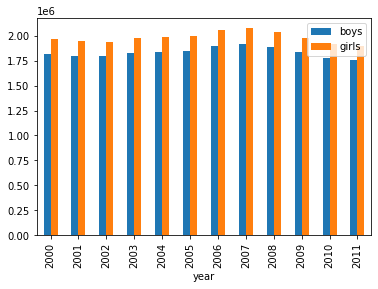

In [ ]:
df.where('year>= 2000').toPandas().plot(kind='bar', x='year');

## 메모리 회수

In [ ]:
sc.stop()